In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

In [2]:
stock = pdr.data.get_data_yahoo('GOOGL')
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-22,532.969971,520.590027,520.609985,532.299988,3319500,532.299988
2014-12-23,542.299988,533.719971,534.510010,538.770020,2877200,538.770020
2014-12-24,540.289978,535.099976,538.820007,536.929993,737700,536.929993
2014-12-26,543.250000,535.489990,536.929993,541.520020,1113500,541.520020
2014-12-29,543.929993,537.159973,540.500000,537.309998,2215000,537.309998
...,...,...,...,...,...,...
2019-12-16,1363.530029,1350.609985,1355.000000,1360.699951,1406400,1360.699951
2019-12-17,1364.329956,1350.770020,1362.410034,1354.890015,1647400,1354.890015
2019-12-18,1359.430054,1350.459961,1357.000000,1351.910034,1166500,1351.910034


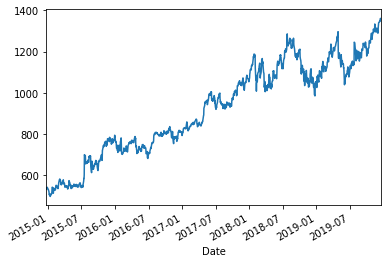

In [3]:
stock['Close'].plot()

In [4]:
training_set= np.array(stock.iloc[:1000, 1:2].values)
testing_set = np.array(stock.iloc[1000: ,1:2].values)

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
sc = MinMaxScaler(feature_range = (0,1))
training_set_s = sc.fit_transform(training_set)
testing_set_s = sc.fit_transform(testing_set)

In [7]:
X_train = []
y_train = []
for i in range(60, len(training_set_s)):
    X_train.append(training_set_s[i-60:i,0])
    y_train.append(training_set_s[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_test = []
y_test = []
for i in range(60, len(testing_set_s)):
    X_test.append(testing_set_s[i-60:i,0])
    y_test.append(testing_set_s[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(940, 60) (940,)
(199, 60) (199,)


In [10]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [11]:
print(X_train.shape, X_test.shape)

(940, 60, 1) (199, 60, 1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

Using TensorFlow backend.


In [13]:
regression = Sequential()

In [14]:
regression.add(LSTM(units = 50,return_sequences= True, input_shape = (X_train.shape[1],1)))
regression.add(Dropout(0.2))
regression.add(LSTM(units = 50,return_sequences= True))
regression.add(Dropout(0.2))
regression.add(LSTM(units = 50,return_sequences= True))
regression.add(Dropout(0.2))
regression.add(LSTM(units = 50,return_sequences= False))
regression.add(Dropout(0.2))

regression.add(Activation('linear'))

regression.add(Dense(units = 1))
regression.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)               

In [15]:
regression.compile(loss = 'mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [16]:
regression.fit(X_train,y_train, epochs = 40, batch_size = 32)

W1220 23:56:47.260677 10304 deprecation_wrapper.py:119] From c:\users\art\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Epoch 1/40
940/940 [==============================] - 5s 5ms/step - loss: 0.0549 - accuracy: 0.0011
Epoch 2/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0091 - accuracy: 0.0011
Epoch 3/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0058 - accuracy: 0.0011
Epoch 4/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0057 - accuracy: 0.0011
Epoch 5/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0055 - accuracy: 0.0011
Epoch 6/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0052 - accuracy: 0.0011
Epoch 7/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0055 - accuracy: 0.0011
Epoch 8/40
940/940 [==============================] - 3s 3ms/step - loss: 0.0048 - accuracy: 0.0011
Epoch 9/40
940/940 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.00 - 3s 3ms/step - loss: 0.0054 - accuracy: 0.0011
Epoch 10/40
940/940 [==============================] - 3s 

In [17]:
predict_price = regression.predict(X_test)

In [19]:
from tensorflow import keras

In [21]:
keras_file = "linear.h5"

In [22]:
keras.models.save_model(regression, keras_file)

In [23]:
from tensorflow.contrib import lite

ImportError: cannot import name 'lite'

In [ ]:
converter = lite.

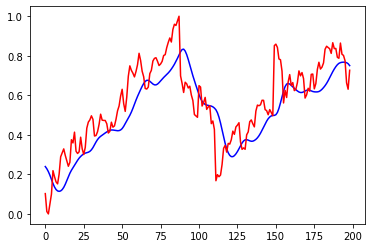

In [71]:
plt.plot(predict_price, color='blue')
plt.plot(y_test, color='red')